<a href="https://colab.research.google.com/github/umanniyaz/Hotel_customer_checkin/blob/main/Assignment_NextGrowthLabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART-1 (Evaluation)


In [ ]:
import re #importing regex expression search library

In [ ]:
find_numbers = '{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}'

In [ ]:
numbers = re.findall(':([0-9]+)',find_numbers) #Finding all the numbers greater than 0 in string leaving the two at last indexes in an array

In [ ]:
print(numbers)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '648', '649', '650', '651', '652', '653', '3']


PART-2 (Evaluation)

# Problem Statement: A hotel needs to predict whether a customer would check in or not.

Methodology:

1.Data Loading 
2.Data Preprocessing(Wranfling,Cleaning,Transformation) & Exploratory Data Analysis 
3.Feature Engineering(Encoding,Scaling)
4.Model Building
5.Model Evaluation

In [ ]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm

In [ ]:
!gdown 1Xzvw-z_glMcOYxJPJ4SckuKrVOulUuzO
!gdown 18S6iRbj6HJ1lo7YdYC3zyai-rImvylMk

Downloading...
From: https://drive.google.com/uc?id=1Xzvw-z_glMcOYxJPJ4SckuKrVOulUuzO
To: /content/train_data_evaluation_part_2.csv
100% 9.05M/9.05M [00:00<00:00, 49.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=18S6iRbj6HJ1lo7YdYC3zyai-rImvylMk
To: /content/test_data_evaluation_part2.csv
100% 105k/105k [00:00<00:00, 93.6MB/s]


In [ ]:
df_train = pd.read_csv(r"/content/train_data_evaluation_part_2.csv",index_col=0)
df_test = pd.read_csv(r"/content/test_data_evaluation_part2.csv",index_col=0)

In [ ]:
df_train.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Preprocessing & Exploratory Data Analysis

1.Looking into dataset deeply
2.Identifying the relation between different features


In [ ]:
#Check df info,datatypes(for categorical features),null columns-Data Wrangling
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82580 entries, 0 to 82579
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82580 non-null  int64  
 1   Nationality           82580 non-null  object 
 2   Age                   78834 non-null  float64
 3   DaysSinceCreation     82580 non-null  int64  
 4   AverageLeadTime       82580 non-null  int64  
 5   LodgingRevenue        82580 non-null  float64
 6   OtherRevenue          82580 non-null  float64
 7   BookingsCanceled      82580 non-null  int64  
 8   BookingsNoShowed      82580 non-null  int64  
 9   BookingsCheckedIn     82580 non-null  int64  
 10  PersonsNights         82580 non-null  int64  
 11  RoomNights            82580 non-null  int64  
 12  DaysSinceLastStay     82580 non-null  int64  
 13  DaysSinceFirstStay    82580 non-null  int64  
 14  DistributionChannel   82580 non-null  object 
 15  MarketSegment      

In [ ]:
df_train.describe().T #Negative values in features as age,DaysSinceCreation,Avg lead time etc need to take care/Categorical features min/max -0-1 in float,int dtypes

,count,mean,std,min,25%,50%,75%,max
ID,82580.0,41290.500000,23838.936952,1.0,20645.75,41290.5,61935.25,82580.00
Age,78834.0,45.468554,16.526276,-11.0,34.00,46.0,57.00,122.00
DaysSinceCreation,82580.0,459.138157,311.309295,12.0,183.00,406.0,728.00,1095.00
AverageLeadTime,82580.0,66.557205,87.928995,-1.0,0.00,30.0,104.00,588.00
LodgingRevenue,82580.0,300.457373,373.337007,0.0,66.40,234.0,403.80,21781.00
OtherRevenue,82580.0,67.890023,114.496223,0.0,2.00,39.0,88.00,7730.25
BookingsCanceled,82580.0,0.002047,0.067177,0.0,0.00,0.0,0.00,9.00
BookingsNoShowed,82580.0,0.000642,0.029725,0.0,0.00,0.0,0.00,3.00
BookingsCheckedIn,82580.0,0.798402,0.696880,0.0,1.00,1.0,1.00,66.00
PersonsNights,82580.0,4.667958,4.562507,0.0,1.00,4.0,7.00,116.00


In [ ]:
#Dropping ID column -Primary Key Type with no importance(Train/Test Datasets)
df_train = df_train.drop('ID',axis=1)
df_test = df_test.drop('ID',axis=1)

In [ ]:
df_train.isnull().sum()

Nationality                0
Age                     3746
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [ ]:
#Age has large null values , will fill it later
df_train.isnull().sum()[df_train.isnull().sum()>0]


Age    3746
dtype: int64

In [ ]:
df_test.isnull().sum()[df_test.isnull().sum()>0]

Age    33
dtype: int64

In [ ]:
df_train.duplicated().sum()

2354

In [ ]:
df_test.duplicated().sum() # Duplicate in train df and test will take care of it

30

In [ ]:
df_train.columns

Index(['Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [ ]:
# Handling duplicate Values
df_train.drop_duplicates(keep='last', inplace=True, ignore_index=True)


In [ ]:
df_test.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [ ]:
#Handling missing values by mean
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())

In [ ]:
#Handling missing values by mean
df_test['Age']=df_train['Age'].fillna(df_test['Age'].mean())

In [ ]:
#Numeric data df
numeric_list =['int64','float64']
dicrete_df = df_train.select_dtypes(include=numeric_list)

In [ ]:
#Deriving Target Variable-Predictor
df_train['BookingsCheckedIn'].value_counts() #Many values as 0 and 1 will derived predictor or dependent variable customer check in

1     60512
0     18268
2      1138
3       132
4        59
5        20
6        20
7        16
8        10
9         9
10        7
11        6
12        4
13        4
29        3
15        3
23        2
14        2
25        1
17        1
66        1
26        1
57        1
40        1
18        1
24        1
19        1
20        1
34        1
Name: BookingsCheckedIn, dtype: int64

In [ ]:
df_train['customer_check_in'] = df_train['BookingsCheckedIn'].apply(lambda x: 0 if x==0 else 1)


In [ ]:
df_test['customer_check_in'] = df_test['BookingsCheckedIn'].apply(lambda x: 0 if x==0 else 1)

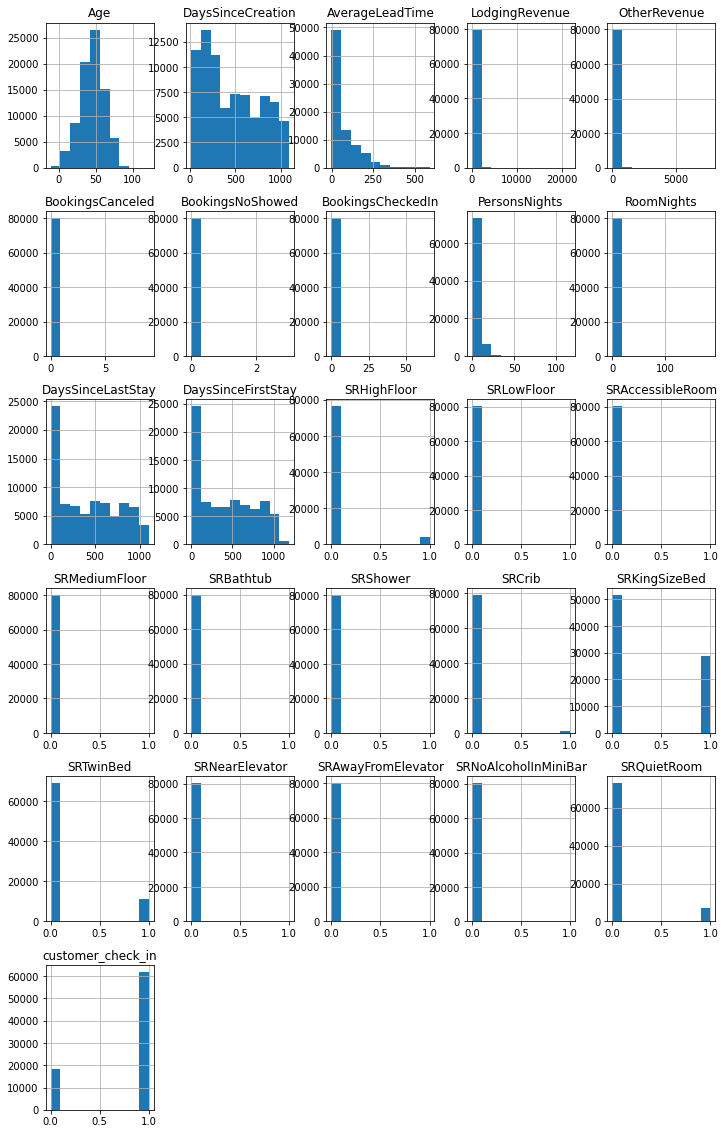

In [ ]:
#Plotting histogram for each feature of dataframe
df_train.hist(figsize=(12,20))
plt.show()

Univariate Analysis(Single Variable)
Bivariate Analysis(Mutiple Variables -relation between independent features and dependent feature)

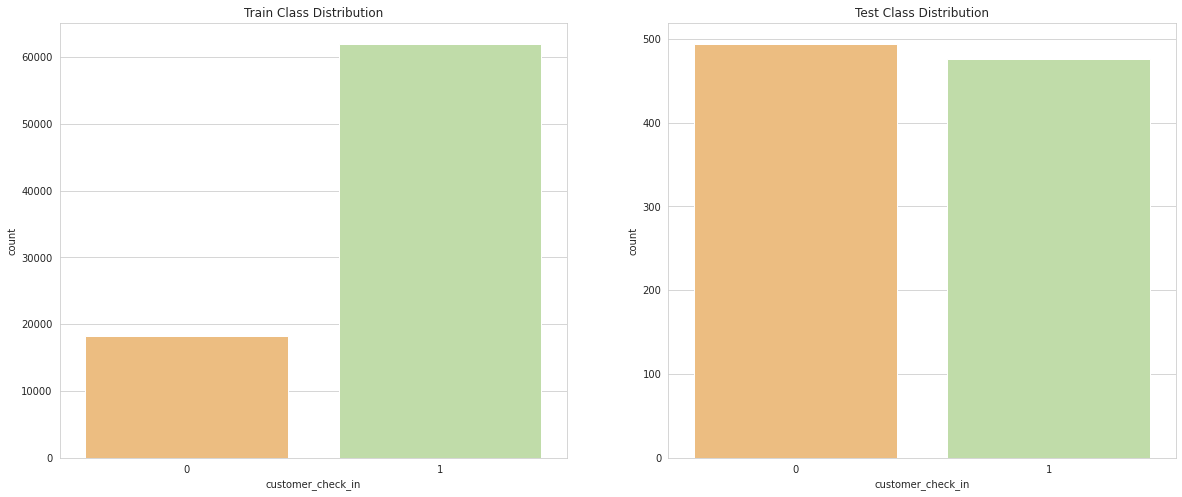

In [ ]:
#Lets check the class distribution
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,2,figsize=(20,8))

sns.countplot(data = df_train, x = 'customer_check_in',palette='Spectral', ax = ax[0])
ax[0].set(title = 'Train Class Distribution')
sns.countplot(data = df_test, x = 'customer_check_in', palette='Spectral',ax = ax[1])
ax[1].set(title = 'Test Class Distribution')
plt.show()


In [ ]:
df_train['customer_check_in'].value_counts(normalize=True) #Distribution not even in df_train -Can be Handled by upsamlping/downsampling
 

1    0.772293
0    0.227707
Name: customer_check_in, dtype: float64

In [ ]:
numerical_feature_list =  ['Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay']

categorical_feature_list_1 = ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'] #Already in 0-1 labels
categorical_feature_list_2 = ['DistributionChannel','MarketSegment']


In [ ]:
def univariate_analysis(features, type):
    if type == 'category_1':
        plt.figure(figsize=(25,25))
        for i in range(1,len(features)+1):
            plt.subplot(4, 4, i)
            ax = sns.countplot(data = df_train, x = features[i-1])
            ax.set(xlabel = features[i-1], ylabel='Count', title= features[i-1]+' Distribution')

    if type == 'category_2':
        plt.figure(figsize=(15,15))
        for i in range(1,len(features)+1):
            plt.subplot(3, 1, i)
            ax = sns.countplot(data = df_train, x = features[i-1])
            ax.set(xlabel = features[i-1], ylabel='Count', title= features[i-1]+' Distribution')

    if type == 'number':
        plt.figure(figsize=(25, 25))
        for i in range(1,len(features)):
            plt.subplot(4, 3, i)
            ax = sns.histplot(data = df_train, x = features[i-1], bins=20, kde=True)
            ax.set(xlabel = features[i-1], ylabel='Count', title= features[i-1]+' Distribution')
            plt.grid()
    
    return plt.show()

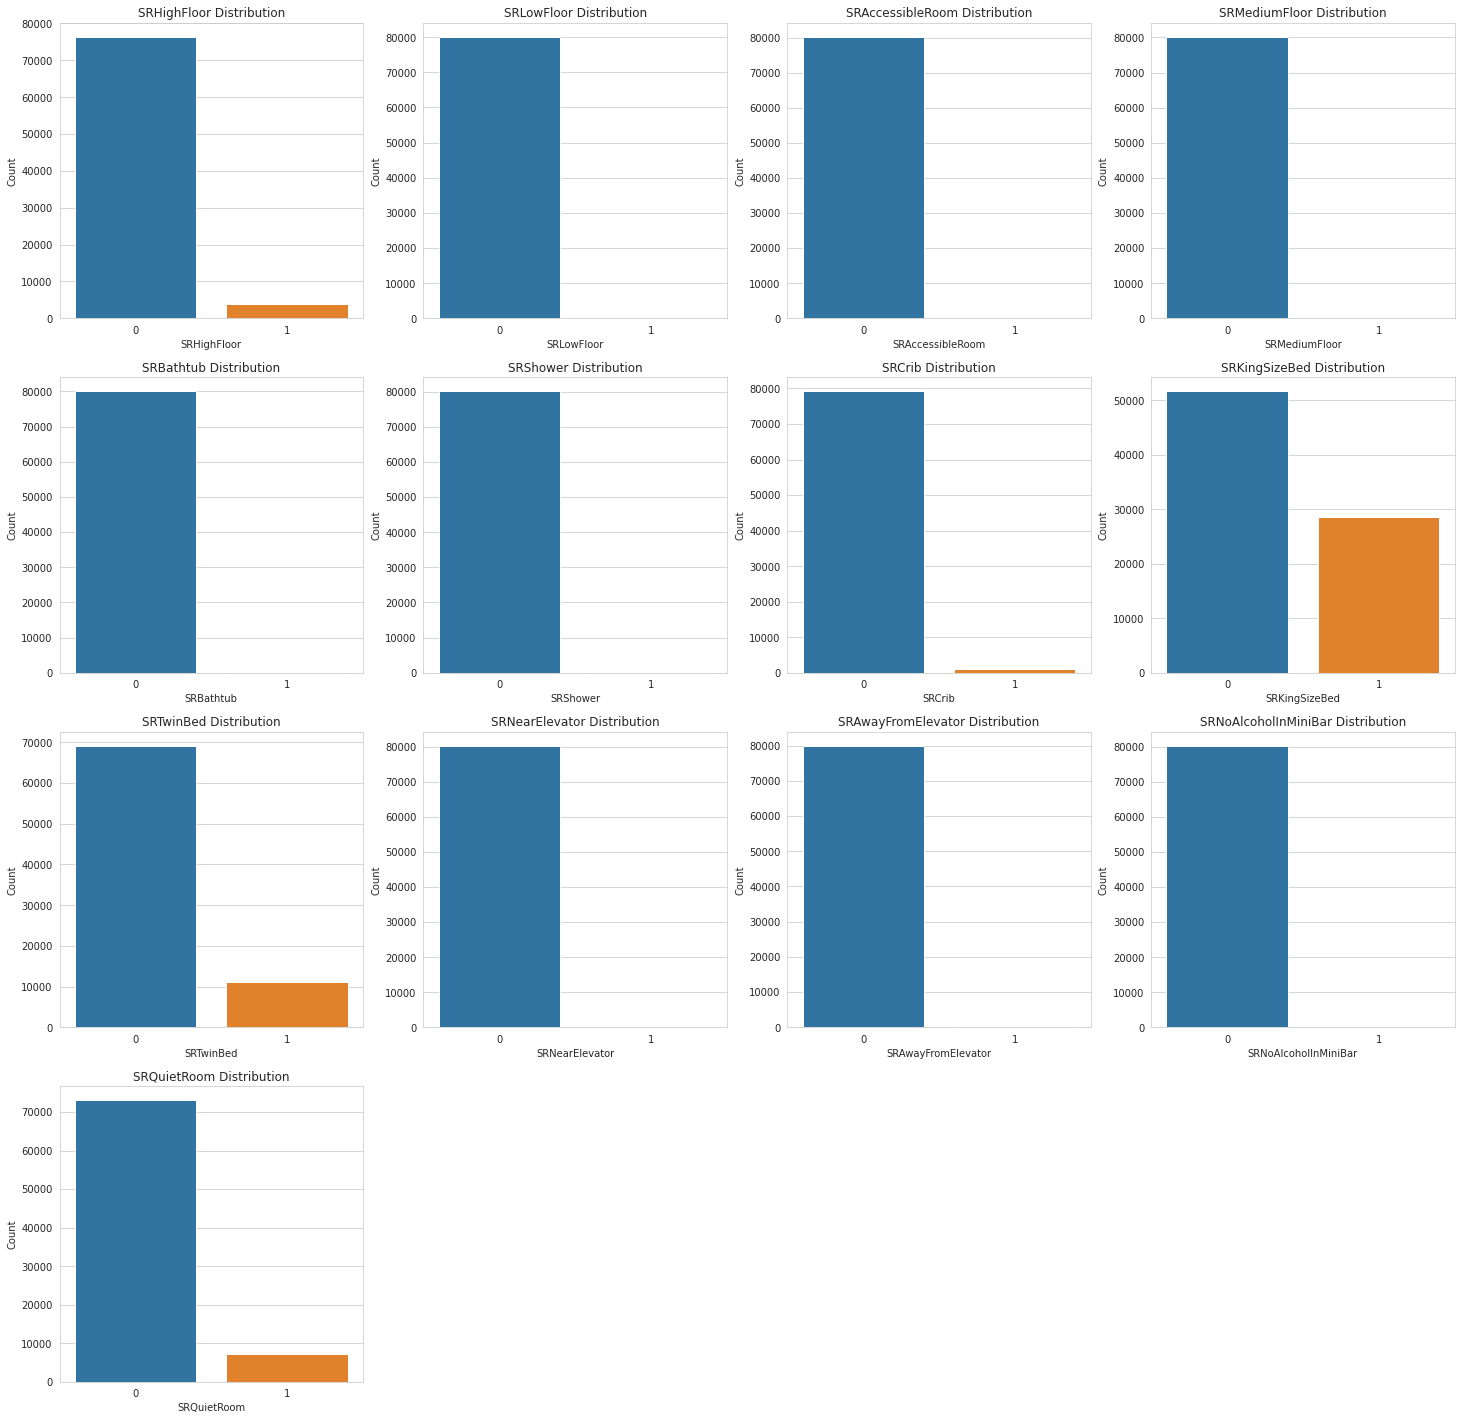

In [ ]:
univariate_analysis(categorical_feature_list_1, 'category_1')

In [ ]:
#Most request for Bookings inlcude customers looking for - KingSizeBed(35%), TwinBed(16%), QuietRoom(10%), HighFloor(4%) and Crib(1%).


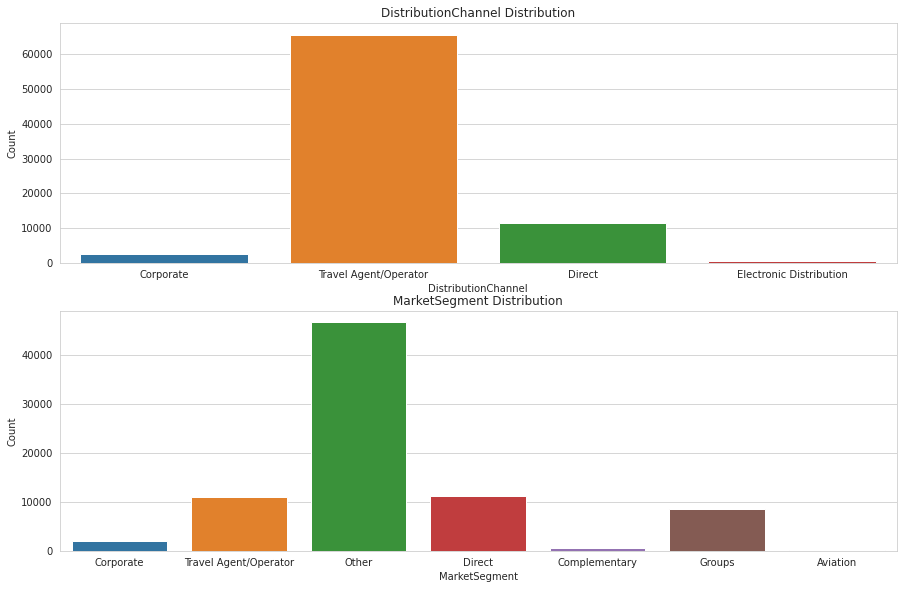

In [ ]:
univariate_analysis(categorical_feature_list_2, 'category_2')

In [ ]:
#Check which mode of checking into hotels customer preferred
#Most preferred book in type is through travel agent followed by direct
df_train['MarketSegment'].value_counts(normalize=True) 
# 57% of customers belong to Other market segment
#14% of customers are Travel Agents
#13.6% are Direct
#11% of the customers are in Groups

Other                    0.581594
Direct                   0.139194
Travel Agent/Operator    0.138247
Groups                   0.106013
Corporate                0.026014
Complementary            0.005908
Aviation                 0.003029
Name: MarketSegment, dtype: float64

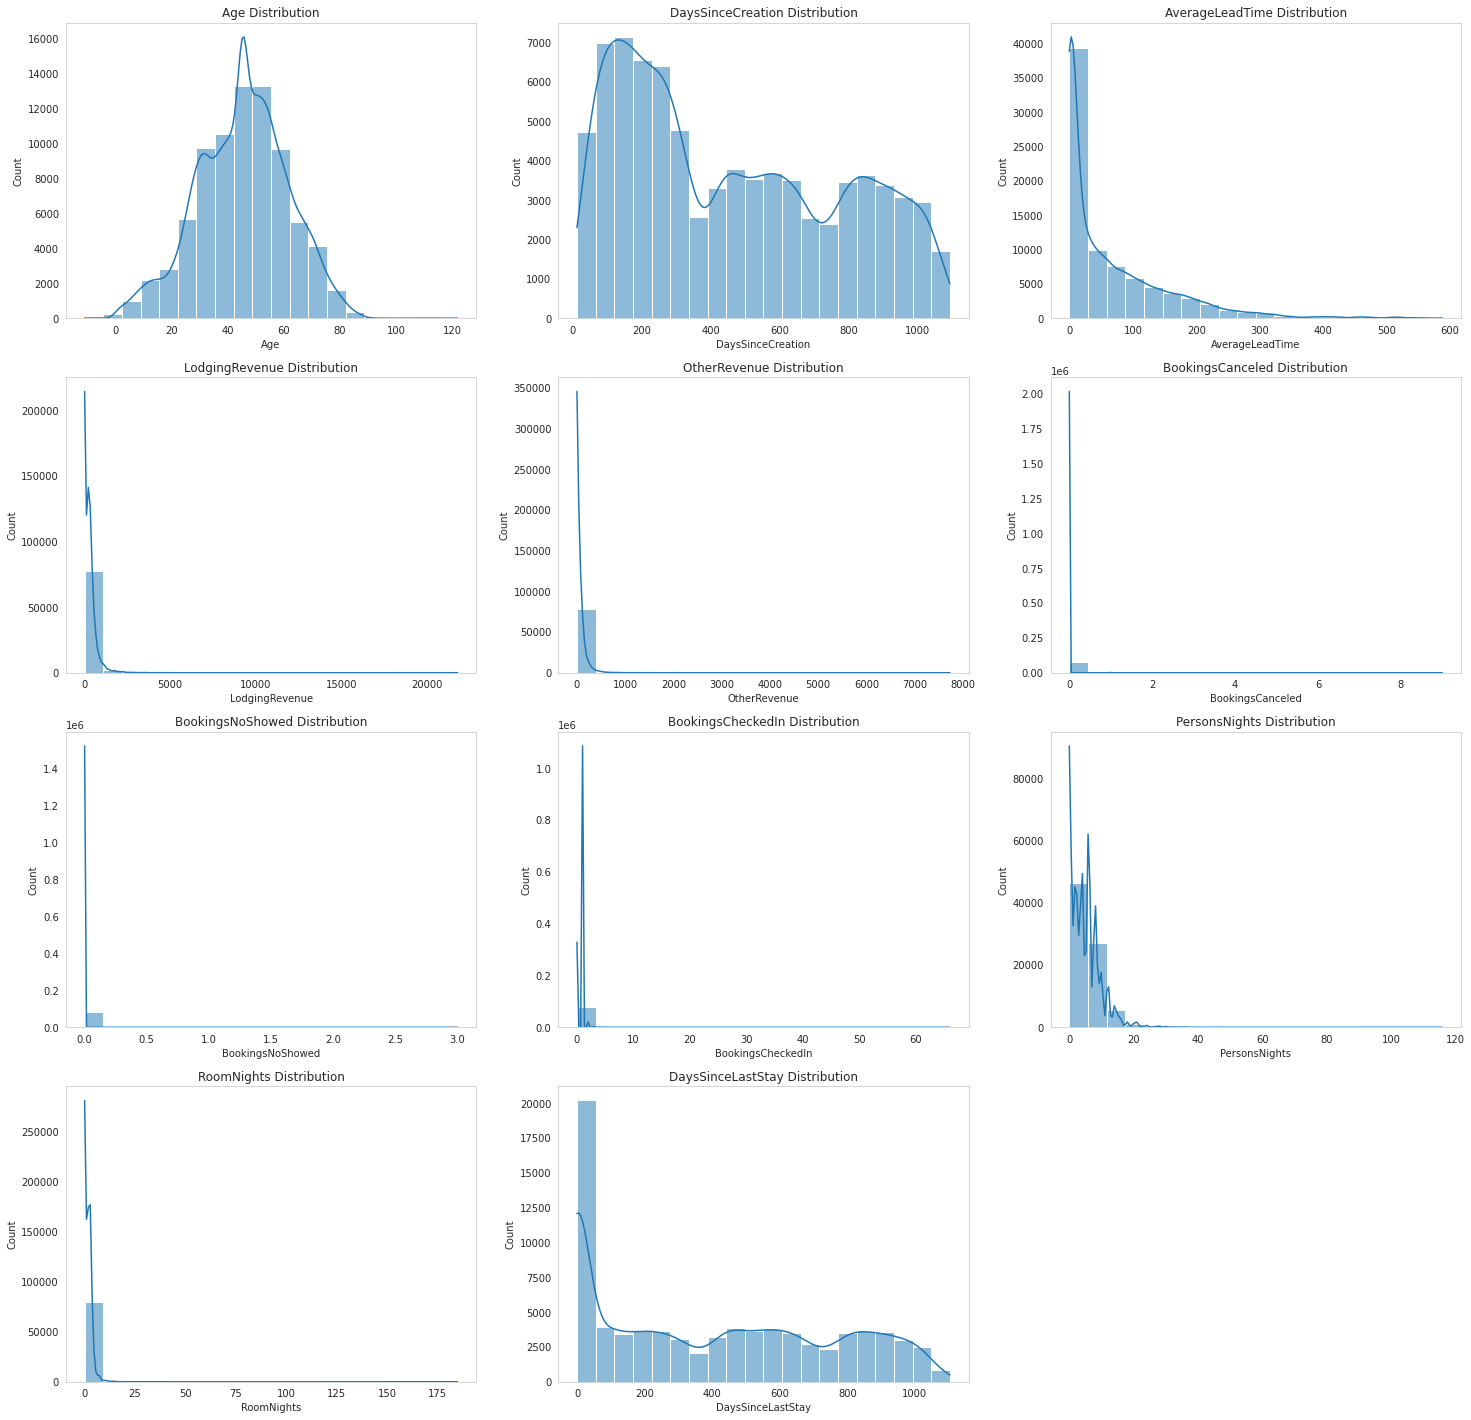

In [ ]:
univariate_analysis(numerical_feature_list, 'number')

In [ ]:
#Lets check most customer countries
df_train['Nationality'].value_counts(normalize=True)
#France among top with 15 % followed by PRT and DEU with 13% and 12 resp...

FRA    0.150039
PRT    0.131790
DEU    0.121756
GBR    0.104991
ESP    0.058709
         ...   
GNQ    0.000012
GIN    0.000012
SWZ    0.000012
SOM    0.000012
NPL    0.000012
Name: Nationality, Length: 188, dtype: float64

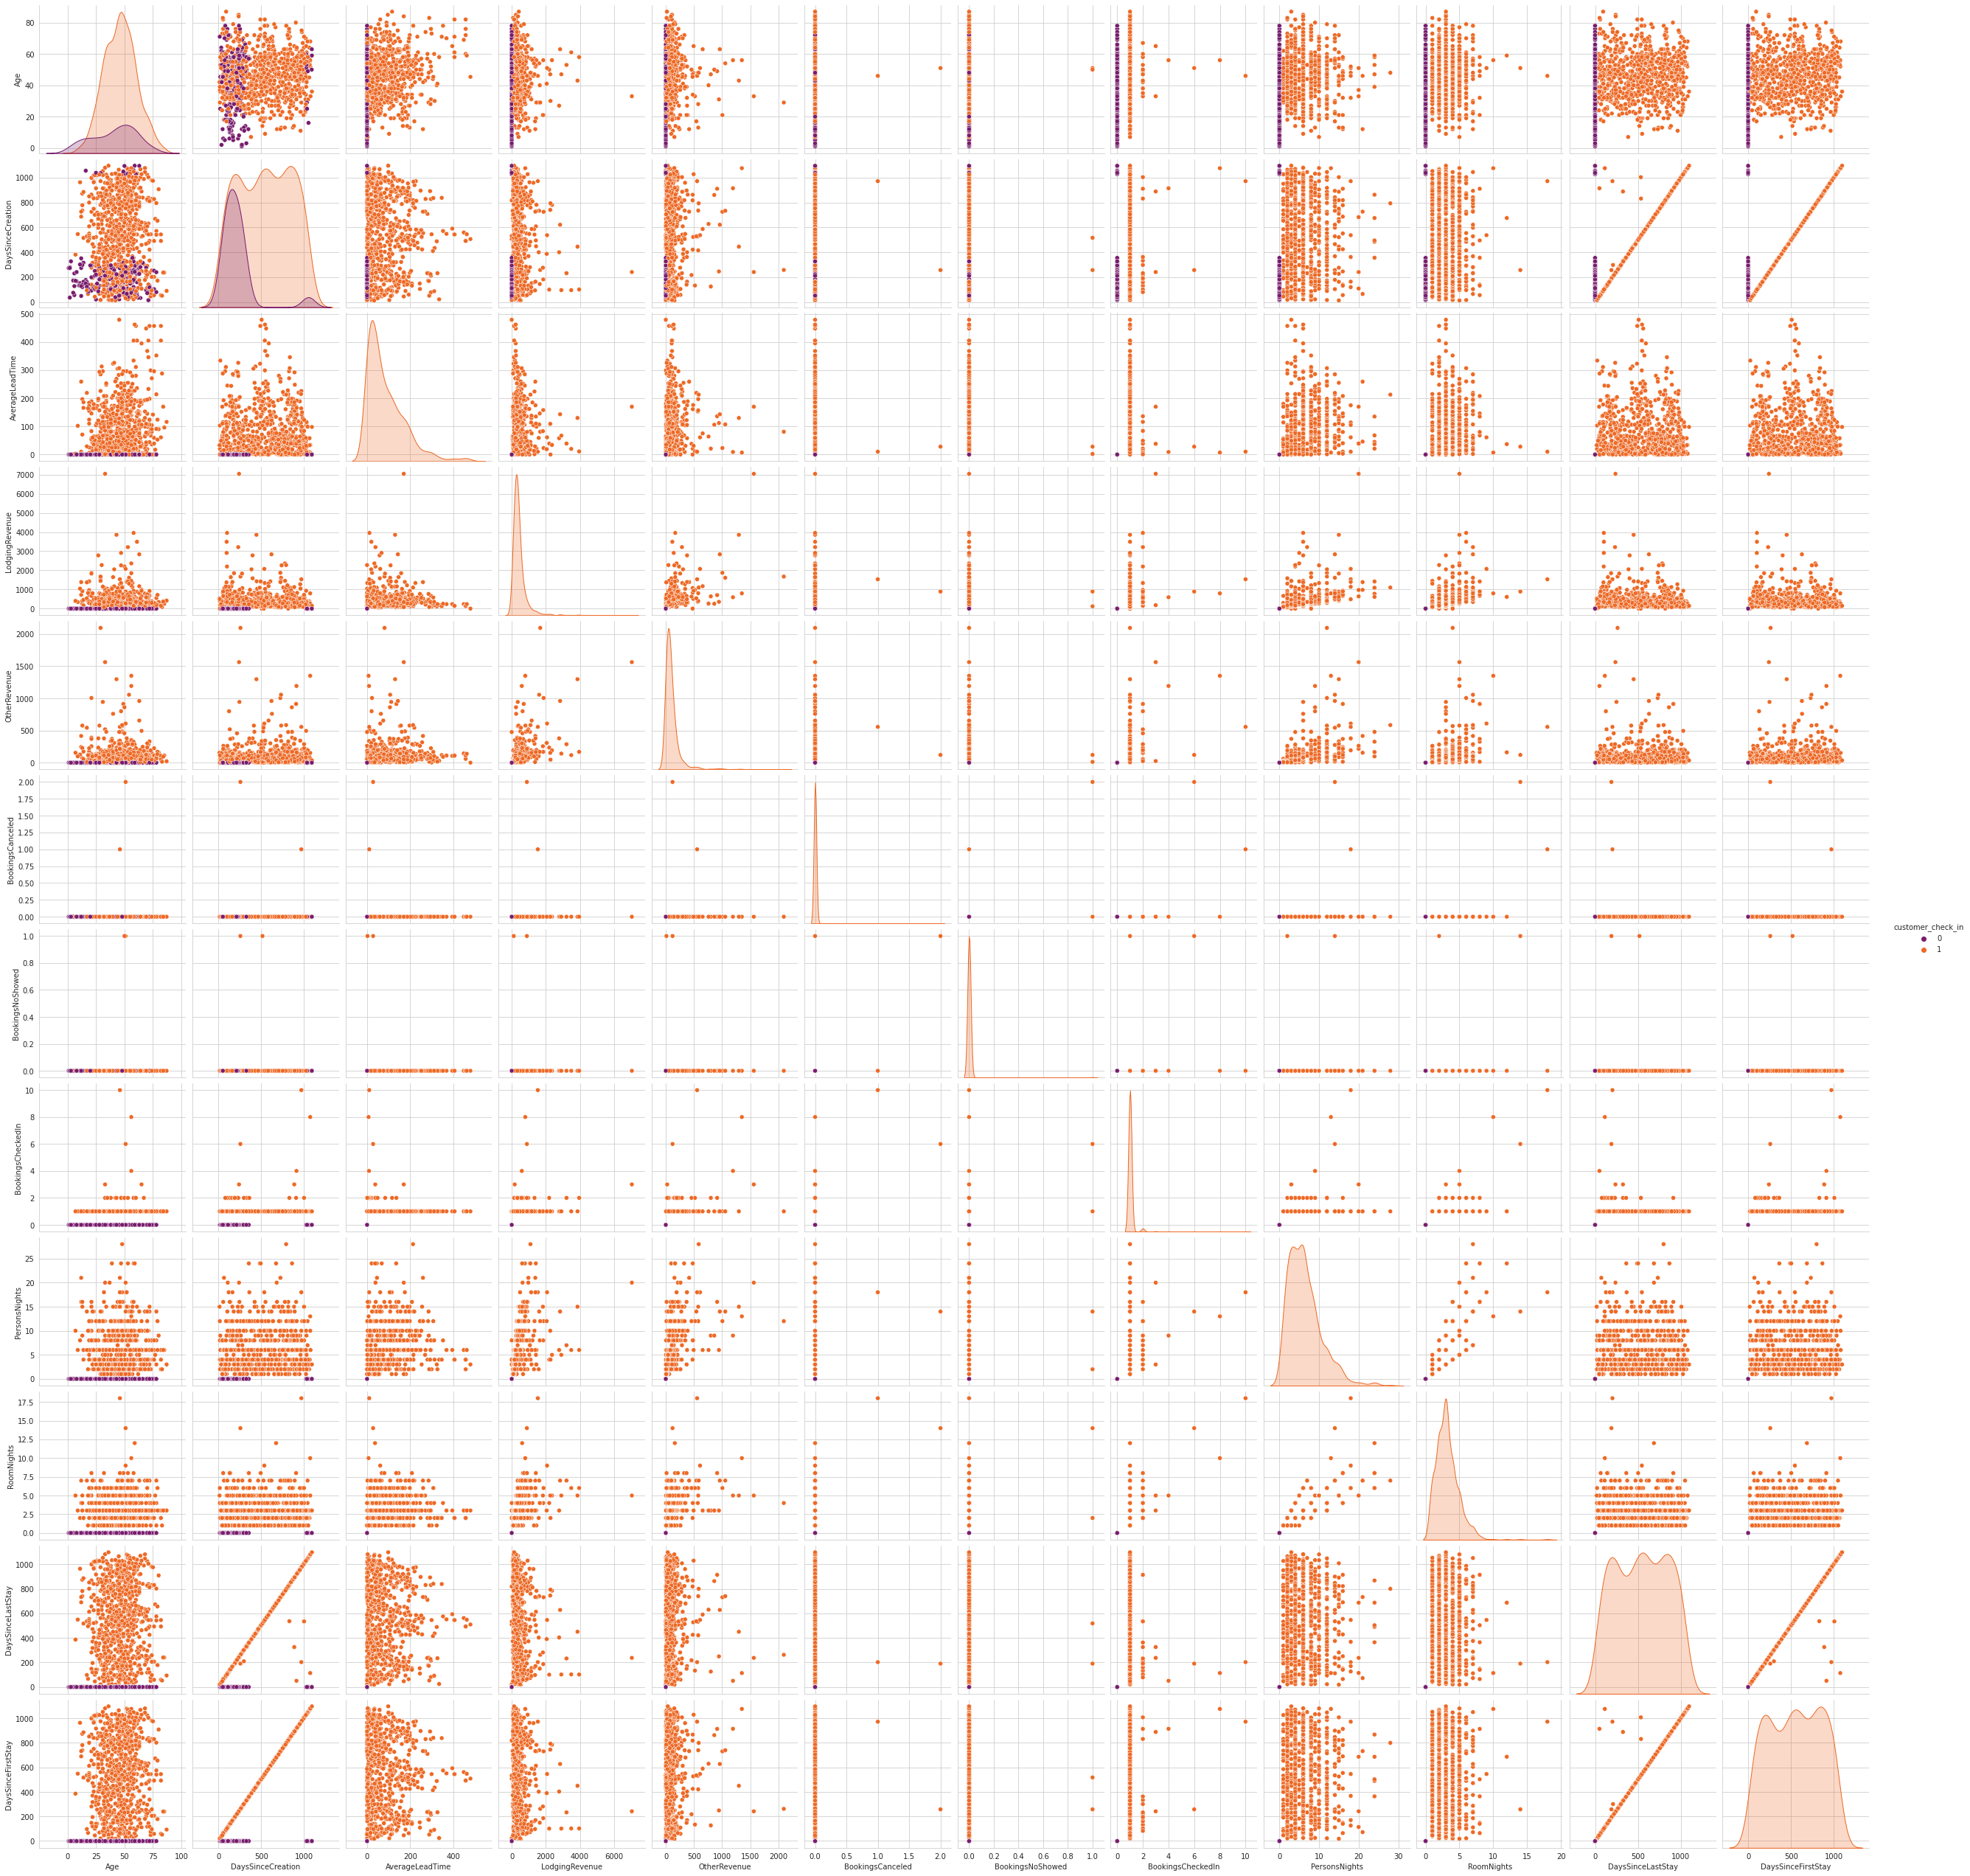

In [ ]:
#pair plot for relation b/w numerical features
sns.pairplot(data=df_train[['Age', 'DaysSinceCreation', 'AverageLeadTime','LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
                         'DaysSinceLastStay', 'DaysSinceFirstStay', 'customer_check_in']].sample(1000), hue='customer_check_in', palette='inferno', height=3)
plt.show()

In [ ]:
def bivariate_analysis(data, feature1, feature2, hue, plot):
    
    sns.set_theme(style = 'darkgrid')
    plt.figure(figsize=(8,7)) 
    if plot=='count':
        ax = sns.countplot(data=data, x=feature1, hue=feature2, palette='Dark2')
        ax.set(xlabel = feature1, ylabel='Count', title= feature1+' Distribution w.r.t '+feature2)
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 50)
        plt.grid('on')
    
    return plt.show()

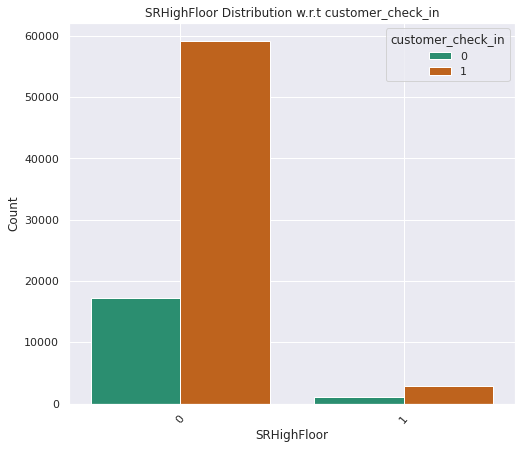

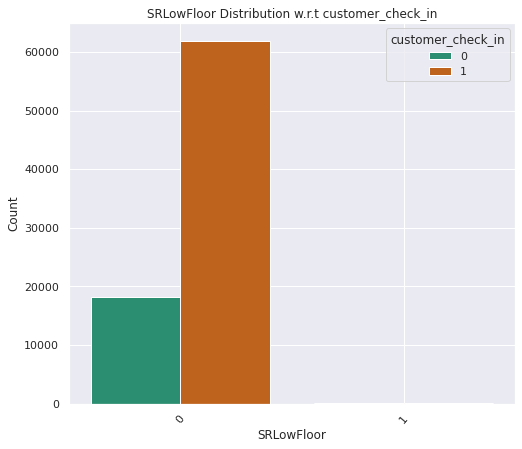

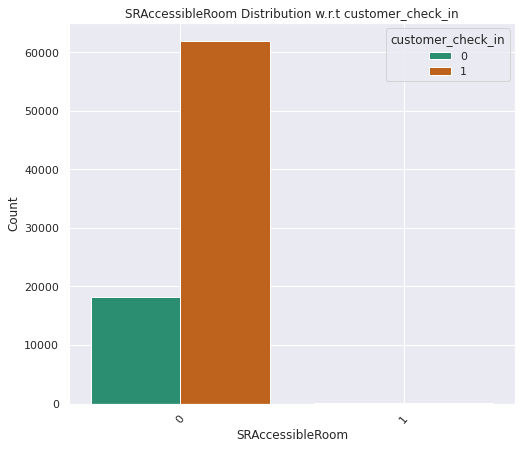

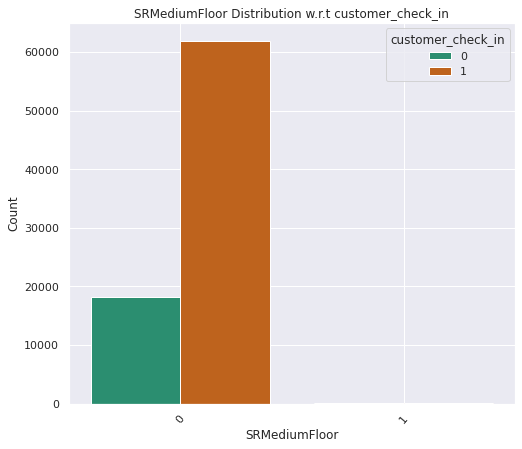

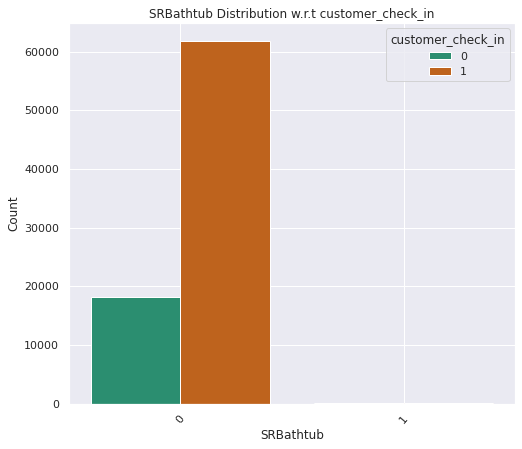

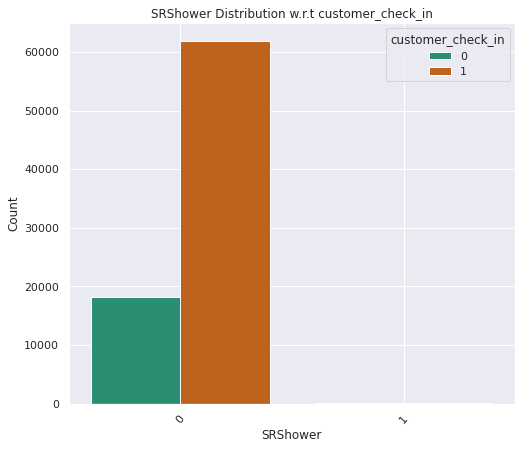

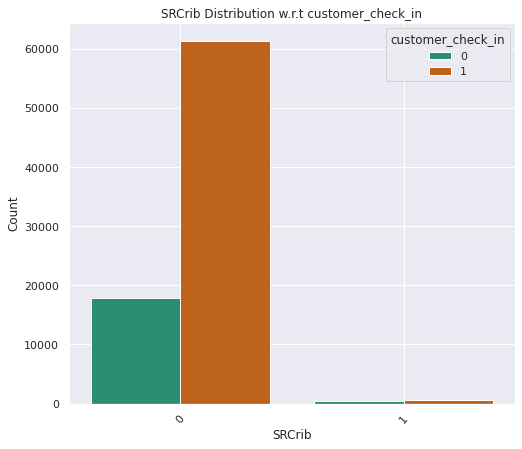

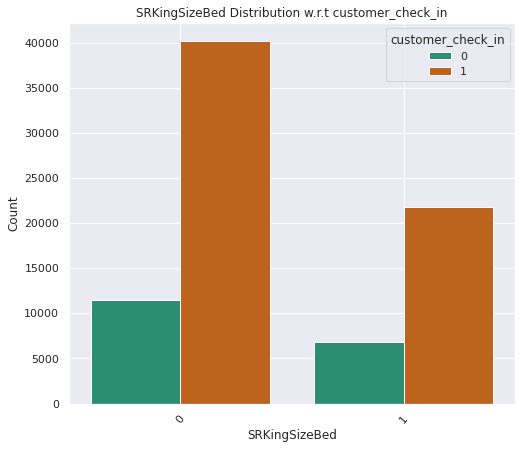

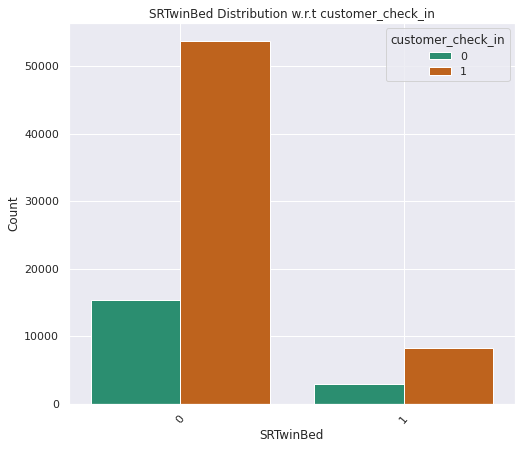

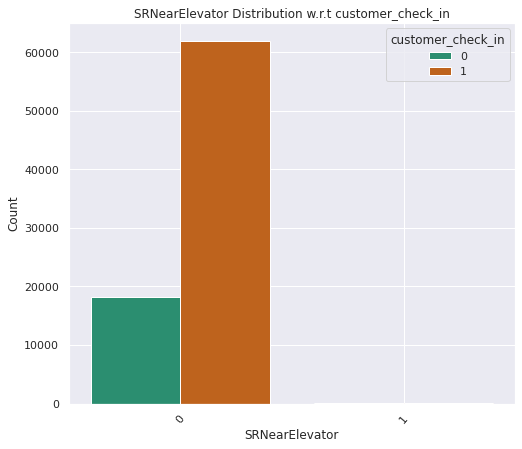

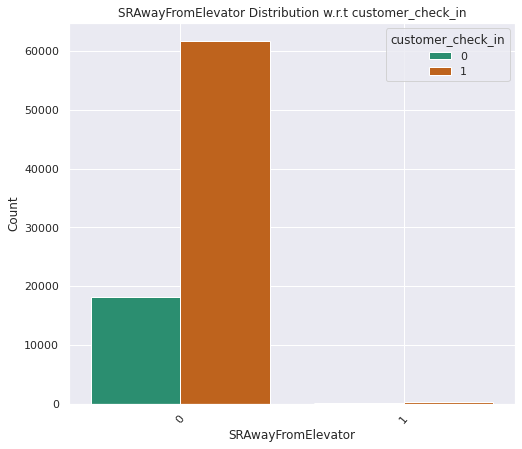

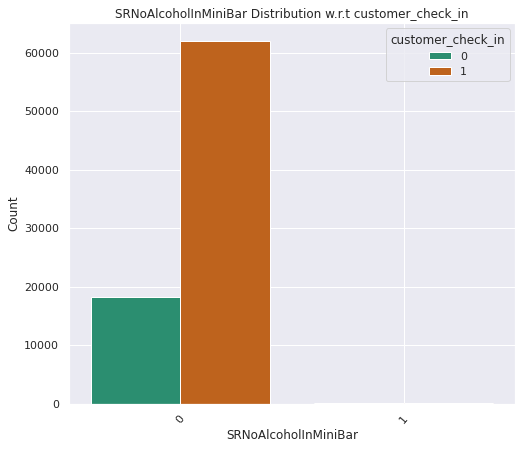

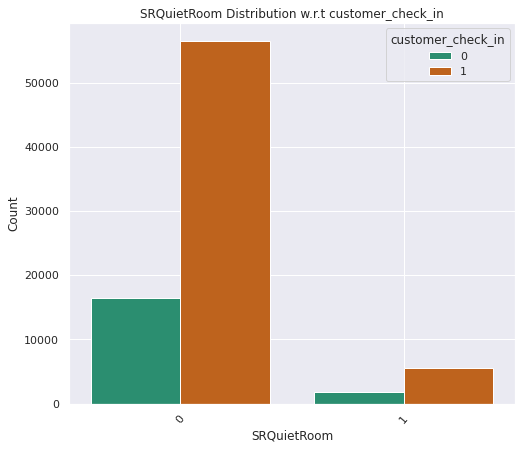

In [ ]:
for category in categorical_feature_list_1:
    bivariate_analysis(df_train, category,'customer_check_in', False, 'count')

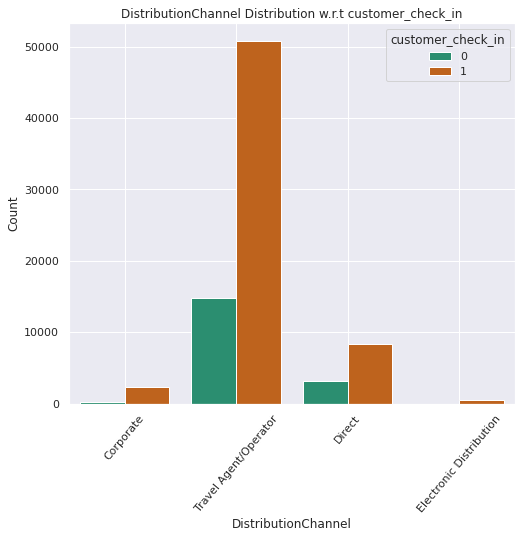

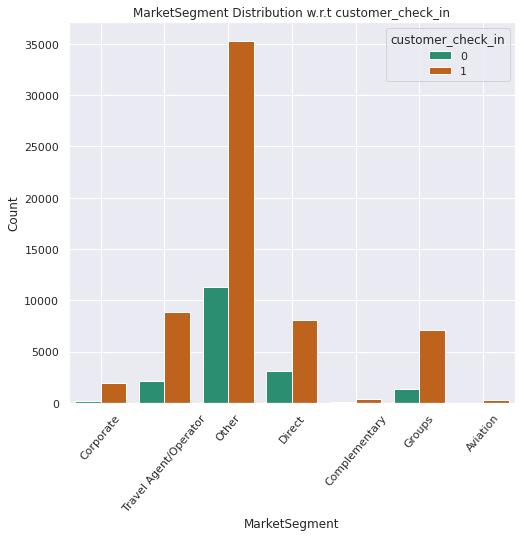

In [ ]:
for category in categorical_feature_list_2:
    bivariate_analysis(df_train, category,'customer_check_in', False, 'count')

In [ ]:
df_train.describe() #There are also outliers in Age

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,customer_check_in
count,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,...,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000
mean,45.399126,460.279373,65.985067,305.667105,68.979395,0.002107,0.000661,0.806484,4.744173,2.403547,...,0.002892,0.001782,0.013038,0.356580,0.138646,0.000312,0.003652,0.000125,0.090071,0.772293
std,16.125376,311.084220,86.351514,376.210900,115.603841,0.068154,0.030158,0.700146,4.586116,2.294074,...,0.053698,0.042182,0.113439,0.478992,0.345579,0.017650,0.060323,0.011164,0.286285,0.419355
min,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,183.000000,0.000000,74.000000,4.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,45.399126,409.000000,30.000000,237.600000,41.000000,0.000000,0.000000,1.000000,4.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,56.000000,728.000000,103.000000,411.000000,89.000000,0.000000,0.000000,1.000000,8.000000,4.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,185.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Will pick up values upto high percentile
def percentile_df(train, range):
    percentiles = np.arange(range[0], range[1],range[2])
    df = pd.DataFrame({'percentile':percentiles, 'age': np.percentile(train['Age'].values, percentiles)})
    return df

In [ ]:
percentile_df(df_train, (95,101,2))

,percentile,age
0,95,71.0
1,97,75.0
2,99,80.0


In [ ]:
percentile_df(df_train, (99,100.1,0.1))

,percentile,age
0,99.0,80.0
1,99.1,80.0
2,99.2,81.0
3,99.3,81.0
4,99.4,82.0
5,99.5,82.0
6,99.6,83.0
7,99.7,84.0
8,99.8,85.0
9,99.9,87.0


In [ ]:
#At percentile 99.9 age is 87 will pick age values with upper limit as 87
lower_limit = 1
upper_limit = 87

df_train = df_train[(df_train['Age']>=lower_limit) & (df_train['Age']<=upper_limit)]
df_test = df_test[(df_test['Age']>=lower_limit) & (df_test['Age']<=upper_limit)]

# Feature Engineering - Extraction and selection
We can add some features that add coorelation to our predictor variable
Also reduce feature for curse of dimensionality

In [ ]:
df_train.columns

Index(['Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'customer_check_in'],
      dtype='object')

In [ ]:
#add a feature total special request made by the customer
df_train['TotalSR'] = df_train[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom','SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
                  'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator','SRNoAlcoholInMiniBar', 'SRQuietRoom']].sum(axis=1)
df_test['TotalSR'] = df_test[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom','SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
                  'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator','SRNoAlcoholInMiniBar', 'SRQuietRoom']].sum(axis=1)

In [ ]:
#We can multiple binary features categorizing the Age groups inetrvals,most booking country,country of hotel,Bookings where cancelled
df_train['OriginCountry'] = df_train['Nationality'].apply(lambda x: 1 if x=='PRT' else 0)
df_test['OriginCountry'] = df_train['Nationality'].apply(lambda x: 1 if x=='PRT' else 0)


In [ ]:
df_train['Adult'] = df_train['Age'].apply(lambda x: 1 if x>=18 else 0)
df_test['Adult'] = df_test['Age'].apply(lambda x: 1 if x>=18 else 0)

In [ ]:
df_train[['BookingsCheckedIn','Nationality']].max()

BookingsCheckedIn     66
Nationality          ZWE
dtype: object

In [ ]:
df_train['MostBookingsCustomers'] = df_train['Nationality'].apply(lambda x: 1 if x=='ZWE' else 0)
df_test['MostBookingsCustomers'] = df_test['Nationality'].apply(lambda x: 1 if x=='ZWE' else 0)


In [ ]:
df_train['BookingsNotCheckedIn'] = df_train[['BookingsNoShowed', 'BookingsCanceled']].sum(axis=1)
df_test['BookingsNotCheckedIn'] = df_test[['BookingsNoShowed', 'BookingsCanceled']].sum(axis=1)

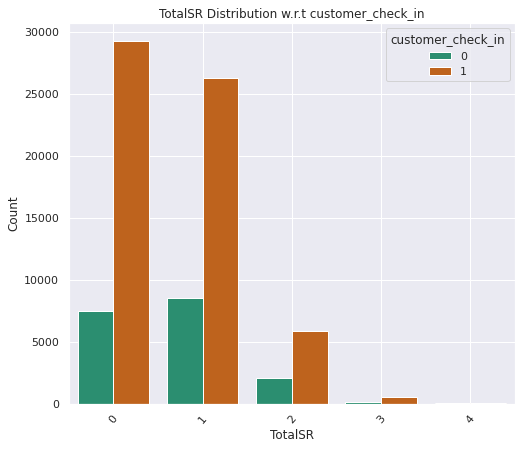

In [ ]:
bivariate_analysis(df_train, 'TotalSR','customer_check_in', False, 'count')

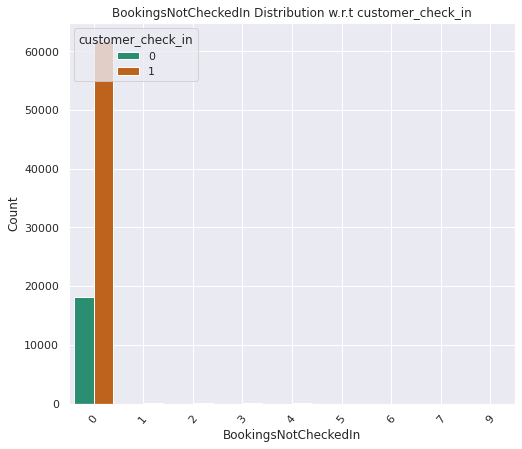

In [ ]:
bivariate_analysis(df_train, 'BookingsNotCheckedIn','customer_check_in', False, 'count')

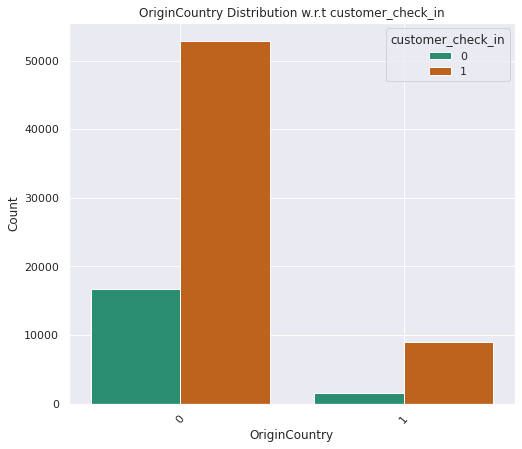

In [ ]:
bivariate_analysis(df_train, 'OriginCountry','customer_check_in', False, 'count')

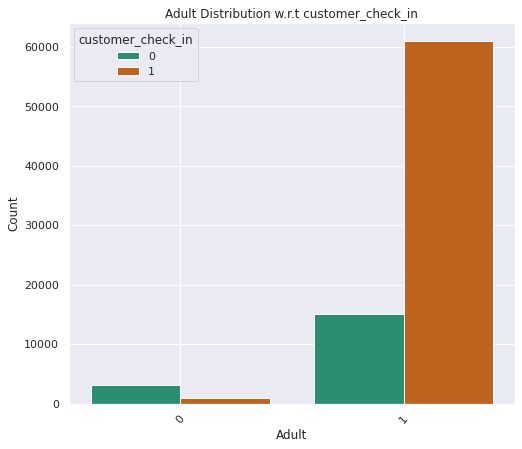

In [ ]:
bivariate_analysis(df_train, 'Adult','customer_check_in', False, 'count')

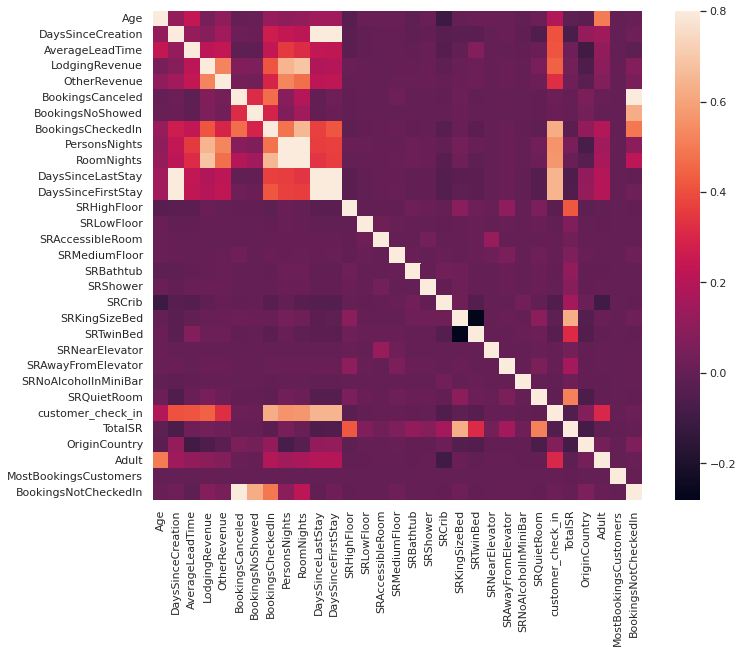

In [ ]:
# Correlation Matrix Heatmap
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
df_train.corr()['customer_check_in'].sort_values(ascending=False)

customer_check_in        1.000000
DaysSinceFirstStay       0.646114
DaysSinceLastStay        0.643777
BookingsCheckedIn        0.625046
RoomNights               0.568599
PersonsNights            0.561478
LodgingRevenue           0.440931
AverageLeadTime          0.414709
DaysSinceCreation        0.410609
OtherRevenue             0.323730
Adult                    0.303204
Age                      0.193390
OriginCountry            0.077484
BookingsNotCheckedIn     0.017434
BookingsCanceled         0.015906
BookingsNoShowed         0.011892
SRAccessibleRoom         0.005105
SRAwayFromElevator       0.004748
SRNearElevator           0.002840
MostBookingsCustomers    0.001917
SRMediumFloor            0.001578
SRShower                -0.000341
SRBathtub               -0.006233
SRLowFloor              -0.007119
SRNoAlcoholInMiniBar    -0.007267
SRQuietRoom             -0.012379
SRKingSizeBed           -0.018432
SRHighFloor             -0.025939
SRTwinBed               -0.029266
TotalSR       

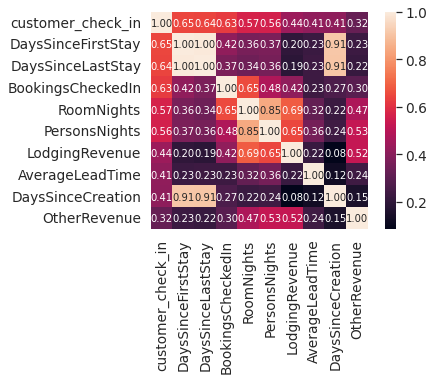

In [ ]:
#top coorelated features with target
k = 10 
cols = corrmat.nlargest(k, 'customer_check_in')['customer_check_in'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,customer_check_in
1,DaysSinceFirstStay
2,DaysSinceLastStay
3,BookingsCheckedIn
4,RoomNights
5,PersonsNights
6,LodgingRevenue
7,AverageLeadTime
8,DaysSinceCreation
9,OtherRevenue


In [ ]:
#removing highly coorelated features (Can be done by hypothesis testing-Chi2 test)
df_train.drop(columns=['DaysSinceFirstStay','DaysSinceLastStay','BookingsCheckedIn','RoomNights','PersonsNights','LodgingRevenue','AverageLeadTime','DaysSinceCreation','OtherRevenue'],inplace=True)
df_test.drop(columns=['DaysSinceFirstStay','DaysSinceLastStay','BookingsCheckedIn','RoomNights','PersonsNights','LodgingRevenue','AverageLeadTime','DaysSinceCreation','OtherRevenue'],inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80119 entries, 0 to 80225
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nationality            80119 non-null  object 
 1   Age                    80119 non-null  float64
 2   BookingsCanceled       80119 non-null  int64  
 3   BookingsNoShowed       80119 non-null  int64  
 4   DistributionChannel    80119 non-null  object 
 5   MarketSegment          80119 non-null  object 
 6   SRHighFloor            80119 non-null  int64  
 7   SRLowFloor             80119 non-null  int64  
 8   SRAccessibleRoom       80119 non-null  int64  
 9   SRMediumFloor          80119 non-null  int64  
 10  SRBathtub              80119 non-null  int64  
 11  SRShower               80119 non-null  int64  
 12  SRCrib                 80119 non-null  int64  
 13  SRKingSizeBed          80119 non-null  int64  
 14  SRTwinBed              80119 non-null  int64  
 15  SR

In [ ]:
df_train['DistributionChannel'].unique()

array(['Corporate', 'Travel Agent/Operator', 'Direct',
       'Electronic Distribution'], dtype=object)

In [ ]:
df_train['MarketSegment'].unique()

array(['Corporate', 'Travel Agent/Operator', 'Other', 'Direct',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [ ]:
def one_hot_encoding(df):
    encoded_df = pd.get_dummies(df)
    return encoded_df

In [ ]:
encoded_features_df_train = one_hot_encoding(df_train[['DistributionChannel','MarketSegment']])

In [ ]:
encoded_features_df_train

,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
80221,0,0,0,1,0,0,0,0,0,1,0
80222,0,0,0,1,0,0,0,0,0,1,0
80223,0,0,0,1,0,0,0,0,0,1,0
80224,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
encoded_features_df_test = one_hot_encoding(df_test[['DistributionChannel','MarketSegment']])

In [ ]:
df_train.drop(columns=['DistributionChannel','MarketSegment'],inplace=True)
df_test.drop(columns=['DistributionChannel','MarketSegment'],inplace=True)


In [ ]:
df_train_final=pd.merge(df_train,encoded_features_df_train,on=df_train.index,how='left')

In [ ]:
df_test_final=pd.merge(df_test,encoded_features_df_test,on=df_test.index,how='left')

In [ ]:
df_train_final = df_train_final.drop('key_0',axis=1)
df_test_final = df_test_final.drop('key_0',axis=1)


In [ ]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80119 entries, 0 to 80118
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Nationality                                  80119 non-null  object 
 1   Age                                          80119 non-null  float64
 2   BookingsCanceled                             80119 non-null  int64  
 3   BookingsNoShowed                             80119 non-null  int64  
 4   SRHighFloor                                  80119 non-null  int64  
 5   SRLowFloor                                   80119 non-null  int64  
 6   SRAccessibleRoom                             80119 non-null  int64  
 7   SRMediumFloor                                80119 non-null  int64  
 8   SRBathtub                                    80119 non-null  int64  
 9   SRShower                                     80119 non-null  int64  
 10

# Model Building and TrainTestSplit

In [ ]:
y = df_train_final['customer_check_in'].values
x = df_train_final.drop(['Nationality','customer_check_in'],axis=1).values

In [ ]:
# y_test = df_test_final['customer_check_in'].values
# y_test = df_test_final.drop(['Nationality','customer_check_in'],axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
#Linear Model
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
y_pred_reg=regressor.predict(x_test)
acc_reg = accuracy_score(y_test, y_pred_reg)
print("Classification Report is:\n",classification_report(y_test,y_pred_reg))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_reg))
print("Training Score:\n",regressor.score(x_train,y_train)*100)
print(f"Accuracy Score of Logistic Regression is : {acc_reg}")

Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.17      0.28      3680
           1       0.80      0.99      0.88     12344

    accuracy                           0.80     16024
   macro avg       0.80      0.58      0.58     16024
weighted avg       0.80      0.80      0.75     16024

Confusion Matrix:
 [[  630  3050]
 [  164 12180]]
Training Score:
 80.09985178251033
Accuracy Score of Logistic Regression is : 0.7994258612081877


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.7704068896655017
Confusion Matrix : 
[[  781  2899]
 [  780 11564]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.50      0.21      0.30      3680
           1       0.80      0.94      0.86     12344

    accuracy                           0.77     16024
   macro avg       0.65      0.57      0.58     16024
weighted avg       0.73      0.77      0.73     16024



In [ ]:
#Bagging classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier()
rf_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf_classifier.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
score=accuracy_score(y_test,y_pred)
score

[[  672  3008]
 [  376 11968]]
              precision    recall  f1-score   support

           0       0.64      0.18      0.28      3680
           1       0.80      0.97      0.88     12344

    accuracy                           0.79     16024
   macro avg       0.72      0.58      0.58     16024
weighted avg       0.76      0.79      0.74     16024



0.7888167748377434

In [ ]:
#Boosting classifier on Gradient Boosting 
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

[15:47:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10,
              objective='reg:linear')

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
xgb_clf = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb_clf.fit(x_train, y_train)

y_pred_xgb_clf = xgb.predict(x_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb_clf)
conf = confusion_matrix(y_test, y_pred_xgb_clf)
clf_report = classification_report(y_test, y_pred_xgb_clf)

print(f"Accuracy Score of Xgb Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")



Accuracy Score of Xgb Classifier is : 0.7991762356465302
Confusion Matrix : 
[[  625  3055]
 [  163 12181]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.17      0.28      3680
           1       0.80      0.99      0.88     12344

    accuracy                           0.80     16024
   macro avg       0.80      0.58      0.58     16024
weighted avg       0.80      0.80      0.74     16024



In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(x_train, y_train)

y_pred_lgbm = lgbm.predict(x_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
clf_report = classification_report(y_test, y_pred_lgbm)

print(f"Accuracy Score of LGBM Classifier is : {acc_lgbm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of LGBM Classifier is : 0.7912506240639041
Confusion Matrix : 
[[  669  3011]
 [  334 12010]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.67      0.18      0.29      3680
           1       0.80      0.97      0.88     12344

    accuracy                           0.79     16024
   macro avg       0.73      0.58      0.58     16024
weighted avg       0.77      0.79      0.74     16024



In [ ]:
#Deep Learning Simple Neural network


In [ ]:
import random
def shuffle_data(X,y):
    zipped = list(zip(X, y))
    random.shuffle(zipped)
    X, y = list(zip(*zipped))
    return np.array(X),  np.array(y)

In [ ]:
len(df_train_final['customer_check_in'].values)


80119

In [ ]:
df_train_final.columns

Index(['Nationality', 'Age', 'BookingsCanceled', 'BookingsNoShowed',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom', 'customer_check_in', 'TotalSR', 'OriginCountry', 'Adult',
       'MostBookingsCustomers', 'BookingsNotCheckedIn',
       'DistributionChannel_Corporate', 'DistributionChannel_Direct',
       'DistributionChannel_Electronic Distribution',
       'DistributionChannel_Travel Agent/Operator', 'MarketSegment_Aviation',
       'MarketSegment_Complementary', 'MarketSegment_Corporate',
       'MarketSegment_Direct', 'MarketSegment_Groups', 'MarketSegment_Other',
       'MarketSegment_Travel Agent/Operator'],
      dtype='object')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_1= df_train_final.drop(['Nationality','customer_check_in'],axis=1)
y_1=np.ravel(df_train_final['customer_check_in'])
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.33, random_state=42)

In [ ]:
# Standard Scaling / Normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_1)
X_train_1 = scaler.transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)

In [ ]:
from tensorflow.keras import callbacks
path = f'model_checkpoint' + '/weights-{epoch:05d}-{val_loss:.5f}.hdf5'
checkpoint_model= callbacks.ModelCheckpoint(filepath = path, monitor = 'val_accuracy', save_best_only=True, verbose=0, mode='max')
earlystop= callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=15, verbose=1, mode='max', restore_best_weights=True)


#Best epochs results model hdf5
#Early Stopping for preventing overfitting

In [ ]:
import shutil 
shutil.rmtree('/content/model_checkpoint')
#shutil.rmtree('/content/model_logs')

In [ ]:
from keras.layers.core.dropout import Dropout
from matplotlib.backend_bases import DrawEvent
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential

model  = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (32, )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 100)               3300      
                                                                 
 dense_65 (Dense)            (None, 100)               10100     
                                                                 
 dense_66 (Dense)            (None, 1)                 101       
                                                                 
Total params: 13,501
Trainable params: 13,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = [checkpoint_model,earlystop]

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , loss = 'binary_crossentropy', metrics = ['accuracy'])

history_1 = model.fit(x = X_train_1, y= y_train_1, validation_data = [X_test_1, y_test_1], batch_size = 256, epochs = 100, verbose = 2, callbacks = callbacks)

Epoch 1/100
210/210 - 1s - loss: 0.4997 - accuracy: 0.7933 - val_loss: 0.4913 - val_accuracy: 0.7991 - 1s/epoch - 6ms/step
Epoch 2/100
210/210 - 1s - loss: 0.4856 - accuracy: 0.8009 - val_loss: 0.4889 - val_accuracy: 0.7994 - 897ms/epoch - 4ms/step
Epoch 3/100
210/210 - 1s - loss: 0.4844 - accuracy: 0.8012 - val_loss: 0.4890 - val_accuracy: 0.7990 - 741ms/epoch - 4ms/step
Epoch 4/100
210/210 - 1s - loss: 0.4836 - accuracy: 0.8013 - val_loss: 0.4882 - val_accuracy: 0.7992 - 736ms/epoch - 4ms/step
Epoch 5/100
210/210 - 1s - loss: 0.4828 - accuracy: 0.8012 - val_loss: 0.4884 - val_accuracy: 0.7993 - 738ms/epoch - 4ms/step
Epoch 6/100
210/210 - 1s - loss: 0.4818 - accuracy: 0.8010 - val_loss: 0.4881 - val_accuracy: 0.7984 - 752ms/epoch - 4ms/step
Epoch 7/100
210/210 - 1s - loss: 0.4821 - accuracy: 0.8012 - val_loss: 0.4866 - val_accuracy: 0.7987 - 735ms/epoch - 4ms/step
Epoch 8/100
210/210 - 1s - loss: 0.4813 - accuracy: 0.8012 - val_loss: 0.4856 - val_accuracy: 0.7990 - 753ms/epoch - 4ms/

In [ ]:
#As there is no significant decrease in validation loss early stopping stops the model at best checkpoint epoch
test_loss, test_acc = model.evaluate(X_test_1, y_test_1)
print('Test accuracy:', test_acc)


827/827 [==============================] - 2s 2ms/step - loss: 0.4913 - accuracy: 0.7991
Test accuracy: 0.7991300821304321


In [ ]:
model_new = tf.keras.models.load_model('/content/model_checkpoint/weights-00002-0.48891.hdf5')
loss, acc= model_new.evaluate(X_test_1,y_test_1)
print('Loss:', loss)
print('Accuracy:', acc)


827/827 [==============================] - 2s 2ms/step - loss: 0.4889 - accuracy: 0.7994
Loss: 0.4889076352119446
Accuracy: 0.7993948459625244


In [ ]:
#conclusion
#For improving the performance we can tune the parameters in NN.(Hyperparameter tuning)
#Also dimensionality reduction can be done by PCA to reduce dimensions
#Layered architecture,finding thresholds for best fits adn evaluation on ruc and auc curves
#Upsampling and Downsampling on imbalanced datasets 